# Trabalho da segunda unidade de Probabilidade
Esse trabalho possui como objetivo análisar os dados referentes a pesquisa no Instituto Metrópole Digital (IMD) e no Departamento de Informática e Matemática Aplicada (DIMAp).

**Componentes**:
- <a href="https://github.com/alvarofpp">Álvaro Ferreira Pires de Paiva</a>
  - Matrícula: 2016039162
  - E-mail: alvarofepipa@gmail.com
- <a href="https://github.com/davir8">Davi Rodrigues de Medeiros</a>
  - Matrícula: 20160143888
  - E-mail: davirodrigues8@gmail.com

## Dados
Os dados utilizados forma retirados do site de <a href="http://dados.ufrn.br/">dados abertos da UFRN</a>. Foram utilizados os seguintes dados:
- <a href="http://dados.ufrn.br/dataset/bolsistas-de-iniciacao-cientifica">Bolsistas de Iniciação Científica</a>
- <a href="http://dados.ufrn.br/dataset/discentes">Discentes</a>
- <a href="http://dados.ufrn.br/dataset/docentes">Docentes</a>
- <a href="http://dados.ufrn.br/dataset/pesquisadores">Pesquisadores</a>
- <a href="http://dados.ufrn.br/dataset/projetos-de-pesquisa">Projetos de pesquisa</a>


###### Sumário
- [Preparando o ambiente](#ambiente)
  - [Tratamento dos dados](#tratamento)
- [Análise](#analise)
  - [Discentes](#discentes)
  - [Docentes](#docentes)

## <a id="ambiente">Preparando o ambiente</a>
Nessa seção, iremos  declarar as dependências necessárias para o Jupyter Notebook executar corretamente, para isso iremos: declarar as variáveis globais que iremos utilizar, importar as libs necessárias e preparar os arquivos que temos para podermos utilizá-los nas seções seguintes.

Primeiramente, instale as dependências a seguir, utilizando seus respectivos comandos:
- **Seaborn**: `conda install -c anaconda seaborn` ([Saiba mais](https://seaborn.pydata.org/))
- **WordCloud**: `conda install -c conda-forge wordcloud` ([Saiba mais](https://github.com/amueller/word_cloud))

In [1]:
# Imports
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Caminhos dos arquivos
path_files = "files/"
path_discentes = path_files + "discentes/"

# Ids
id_imd = 6069
id_dimap = 125

### <a id="tratamento">Tratamento dos dados</a>
Nessa seção, iremos tratar os dados de arquivos diferentes, de forma que iremos conseguir juntar dados de multiplos arquivos em um só, a fim de facilitar as análises que podemos realizar posteriormente.

A seguir, iremos filtrar os **discentes** para, exclusivamente, os que ingressaram no curso de Bacharelado em Tecnologia da Informação (BTI).

In [3]:
# DataFrame que terá os dados dos ingressantes
df_ingressantes_imd = pd.DataFrame()

# Percorrer todos os arquivos de discentes
for root, dirs, files in os.walk(path_discentes):
    for filename in files:
        print(root + filename)
        # Ler arquivo
        df_ingressantes = pd.read_csv((root + filename), sep=';')
        # Filtra pelo curso 
        df_ingressantes_filter = df_ingressantes[df_ingressantes.nome_curso == "TECNOLOGIA DA INFORMAÇÃO"]
        # Salva no DataFrame que declaramos no início
        df_ingressantes_imd = pd.concat([df_ingressantes_imd, df_ingressantes_filter])

files/discentes/discentes-2014
files/discentes/discentes-2018
files/discentes/discentes-2016
files/discentes/discentes-2017
files/discentes/discentes-2013
files/discentes/discentes-2015


In [4]:
# Remove as colunas que não iremos utilizar
df_ingressantes_imd = df_ingressantes_imd.drop(columns=['sigla_nivel_ensino', 'nivel_ensino',
                                  'id_curso', 'nome_curso',
                                  'id_unidade', 'nome_unidade',
                                 'id_unidade_gestora', 'nome_unidade_gestora'])

# Converte colunas que são float, mas deveriam ser int
df_ingressantes_imd.matricula = df_ingressantes_imd.matricula.astype('int64')
df_ingressantes_imd.periodo_ingresso = df_ingressantes_imd.periodo_ingresso.astype('int64')

# Exibe algumas linhas do DataFrame
df_ingressantes_imd.head(3)

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,modalidade_educacao
56,2014065430,ADAUTO VIEIRA DE ARAÚJO GUEDES,2014,1,SiSU,REGULAR,CANCELADO,PRESENCIAL
135,2014052728,ADRIANA ARAUJO DE ALBUQUERQUE ANDRADE,2014,1,SiSU,REGULAR,CANCELADO,PRESENCIAL
364,2014065270,ALAN VITOR COSTA DE OLIVEIRA,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL


In [5]:
# Salvamos os dados no arquivo
df_ingressantes_imd.to_csv('data/discentes_imd.csv')

Agora iremos filtrar os **docentes** para, exclusivamente, os docentes que possuem como unidade de lotação o Instituto Metrópole Digital (IMD) ou o Departamento de Informática e Matemática Aplicada (DIMAp), visto que vários professores que lecionam disciplinas no IMD na verdade são do DIMAp.

In [6]:
# Todos os docentes
df_docentes = pd.read_csv(('files/docentes.csv'), sep=';')

# Filtramos para os que são do IMD ou DIMAp
df_docentes_imd = df_docentes[df_docentes.id_unidade_lotacao.isin([id_imd,id_dimap])]

# Remove as colunas que não nos servem para nada
df_docentes_imd = df_docentes_imd.drop(columns=['siape', 'Unnamed: 11',
                                  'id_unidade_lotacao', 'lotacao'])

# Exibe algumas linhas do DataFrame
df_docentes_imd.head(3)

,id_servidor,nome,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,admissao
13,5757141,ALUIZIO FERREIRA DA ROCHA NETO,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2015-01-28 00:00:00
15,5756816,ALYSON MATHEUS DE CARVALHO SOUZA,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2014-07-11 00:00:00
25,5756955,ANDRE LUIZ DE SOUZA BRITO,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2014-07-15 00:00:00


In [7]:
# Salvamos o arquivo
df_docentes_imd.to_csv('data/docentes_imd.csv')

Agora iremos filtrar os **bolsista de iniciação científica** para, exclusivamente, os discentes do curso de Tecnologia da Informação.

In [8]:
# Todos os bolsistas de iniciação científica
df_bolsistas = pd.read_csv(('files/bolsistas-de-iniciacao-cientifica.csv'), sep=';')

# Filtramos para os que são do IMD
df_bolsistas_imd = df_bolsistas[df_bolsistas.id_unidade == id_imd]

# Remove as colunas que não nos servem para nada
df_bolsistas_imd = df_bolsistas_imd.drop(columns=['Unnamed: 20',
                                  'id_unidade', 'unidade'])

# Exibe algumas linhas do DataFrame
df_bolsistas_imd.head(3)

,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status
768,657578,2014068307,ALICE GABRIELA ALVES DE SALES FARIAS,Modulo de comunicação para sistema Embarcado d...,PIT12872-2016,117151961,2016,5756871,EDUARDO NOGUEIRA CUNHA,Iniciação Científica (IC),VOLUNTÁRIO,Monitoramento Residencial,NaN,NaN,2016-2017,2016-08-10,NaN,PENDENTE DE RELATORIO
1030,693925,2015041845,ALLAN VALDIVINO GONÇALVES,Detecção de Code Smells em sistemas Python,PIT14429-2017,123478649,2017,5757883,EIJI ADACHI MEDEIROS BARBOSA,Iniciação Científica (IC),VOLUNTÁRIO,Engenharia de Software,NaN,NaN,2017-2018,2017-08-02,NaN,EM ANDAMENTO
1294,693430,2015032710,AMANDA MARIA DOMINGOS DE OLIVEIRA,OBJETOS DE APRENDIZAGEM PARA O ENSINO DE MATEM...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2017-2018,2017-08-05,NaN,EM ANDAMENTO


In [9]:
# Salvamos o arquivo
df_bolsistas_imd.to_csv('data/bolsistas_imd.csv')

Agora iremos pegar os **projetos de pesquisa** realizados pelos professores do IMD e DIMAp.

In [10]:
# Todos os projetos de pesquisa
df_projetos_pesquisa = pd.read_csv('files/projetos-de-pesquisa.csv', sep=';')

# Tiramos os que não possuem o ID do coordenador
df_projetos_pesquisa = df_projetos_pesquisa[~df_projetos_pesquisa.id_coordenador.isnull()]

# Remove as colunas que não nos servem
df_projetos_pesquisa = df_projetos_pesquisa.drop(columns=['Unnamed: 20'])

# Converte o tipo da coluna
df_projetos_pesquisa.id_coordenador = df_projetos_pesquisa.id_coordenador.astype('int64')

# Exibe algumas linhas do DataFrame
df_projetos_pesquisa.head(3)

,id_projeto_pesquisa,codigo_projeto,titulo,palavras_chave,id_projeto,ano,data_inicio,data_fim,situacao,tipo_projeto,categoria_projeto,id_unidade,unidade,id_coordenador,coordenador,edital,id_grupo_pesquisa,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq
0,124784693,PVB14909-2018,Desenvolvimento de zeóitas de alta acessibilid...,Alta acessibilidade; MCM22; zeólitas,91815273,2018,2018-01-01,2019-12-31,EM EXECUÇÃO,EXTERNO,Pesquisa Científica,6025,INSTITUTO DE QUÍMICA,5753414,SIBELE BERENICE CASTELLA PERGHER,NaN,116359675,Laboratório de Peneiras Moleculares - LABPEMOL,Zeólitas,Físico-Química
1,124089967,PVB14922-2018,Processos e Propriedades em Reservatórios Carb...,"Carbonatos, Reservatórios, Fraturados,",91814641,2018,2018-01-04,2022-01-03,EM EXECUÇÃO,EXTERNO,Pesquisa Científica,123,DEPARTAMENTO DE GEOLOGIA,21737,FRANCISCO HILARIO REGO BEZERRA,NaN,103337635,SISTEMAS PETROLÍFEROS,Estudos Geológicos das Bacias Sedimentares,Sedimentologia
2,127435249,PVB14987-2018,Tecnologia Sustentável para fins de dessaliniz...,"nanofiltro, dessalinização, água, nanoestruturas",91816855,2018,2018-01-01,2020-12-31,EM EXECUÇÃO,EXTERNO,Inovação,121,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,26026,CARLOS CHESMAN DE ARAUJO FEITOSA,NaN,89008515,Nanoestruturas magnéticas e semicondutoras,Transporte em nanoestruturas,"Metrologia, Técnicas Gerais de Laboratório, Si..."


In [11]:
# Salvamos o arquivo
df_projetos_pesquisa.to_csv('data/projetos.csv')

Agora iremos pegar os **pesquisadores** vinculados ao IMD ou ao DIMAp.

In [12]:
# Todos os pesquisadores
df_pesquisadores = pd.read_csv('files/pesquisadores.csv', sep=';')

# Filtramos para os que são do IMD
df_pesquisadores = df_pesquisadores[df_pesquisadores.id_unidade.isin([id_imd,id_dimap])]

# Remove as colunas que não nos servem para nada
df_pesquisadores = df_pesquisadores.drop(columns=['Unnamed: 9'])

# Mostramos algumas linhas do DataFrame
df_pesquisadores.head(3)

,id_servidor,nome,id_unidade,unidade,id_centro,centro,coordenador,internos,externos
86,5757141,ALUIZIO FERREIRA DA ROCHA NETO,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,1,1,1
89,5756816,ALYSON MATHEUS DE CARVALHO SOUZA,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,1,2,0
138,5755819,ANDERSON PAIVA CRUZ,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,0,0,1


In [13]:
# Salvamos o arquivo
df_pesquisadores.to_csv('data/pesquisadores_imd.csv')

Aqui iremos vincular diferentes arquivos de dados, a fim de gerarmos arquivos finais para facilitar a exibição de gráficos e afins.

Agora iremos fazer o merge com as informações dos bolsista de iniciação científica e dos discentes do Instituto Metrópole Digital.

In [14]:
# Merge entre os discentes e os bolsistas do imd utilizando como base a coluna matricula
df_discentes_bolsistas = pd.merge(df_ingressantes_imd, df_bolsistas_imd, on='matricula')

# Mostramos algumas linhas do Dataframe
df_discentes_bolsistas.head(3)

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status_x,modalidade_educacao,id_discente,discente,...,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status_y
0,2014065216,BRENO WESLEY BATISTA DE ARAÚJO,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL,653443,BRENO WESLEY BATISTA DE ARAÚJO,...,EUGENIO PACCELLI AGUIAR FREIRE,Iniciação Tecnológica (IT),PROPESQ,Oralidade digital na educação,115017057.0,Grupo Interdisciplinar de Estudos e Pesquisas ...,2015-2016 Propesq,2015-10-03,2016-04-27 00:00:00,FINALIZADO
1,2014026450,DEBORA EMILI COSTA OLIVEIRA,2014,1,SiSU,REGULAR,CONCLUÍDO,PRESENCIAL,642409,DEBORA EMILI COSTA OLIVEIRA,...,ISABEL DILLMANN NUNES,Iniciação Tecnológica (IT),PIBITI UFRN,Análise de Dados Educacionais,125841829.0,Ciência Cognitiva e de Dados,2016-2017,2016-12-26,NaN,FINALIZADO
2,2014048977,PAULO SERGIO SILVA DE MENDONÇA,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL,645253,PAULO SERGIO SILVA DE MENDONÇA,...,ISABEL DILLMANN NUNES,Iniciação Científica (IC),VOLUNTÁRIO,Análise de Dados Educacionais,125841829.0,Ciência Cognitiva e de Dados,2016-2017,2016-08-08,NaN,FINALIZADO


In [15]:
# Salvamos o arquivo
df_discentes_bolsistas.to_csv('data/discentes_bolsistas_imd.csv')

## <a id="analise">Analise</a>
Nessa seção, iremos realizar algumas análises dos dados de discentes e docentes, a fim de entendermos melhor o papel de ambos no contexto de desenvolvimento de pesquisa científica.

In [16]:
sns.set_context("notebook")

### <a id="discentes">Discentes</a>
Aqui iremos analisar os dados dos discentes de Tecnologia da Informação utilizando gráficos e consultas estudados em sala de aula.

- Qual a situação dos alunos que ingressaram em BTI?
- Qual a porcentagem de bolsistas em cada categoria?
- Qual a situação atual das bolsas de iniciação cientifica dos alunos do BTI?
- Qual a quantidade de bolsistas por ano?
- Qual a quantidade de alunos bolsistas participantes de grupos de pesquisa?

Text(9.223,0.5,'Quantidade')

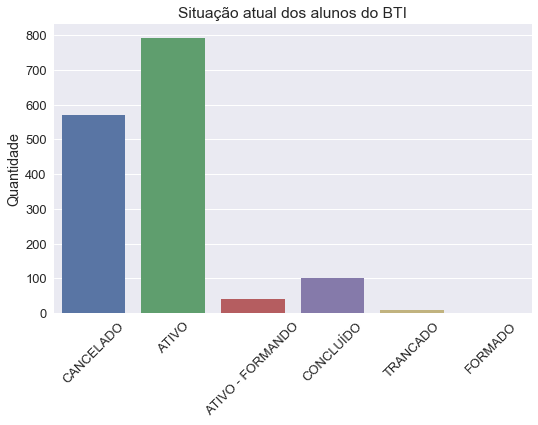

In [17]:
## Qual a situação dos alunos que ingressaram em BTI?

# Criamos um gráfico de barras com a situação de todos os estudante do BTI
sns.set(font_scale=1.3)
g = sns.factorplot("status", data=df_ingressantes_imd, kind="count", size=5, aspect=1.5)
g.set_xticklabels(rotation=45)
plt.title('Situação atual dos alunos do BTI')
plt.xlabel('')
plt.ylabel('Quantidade')

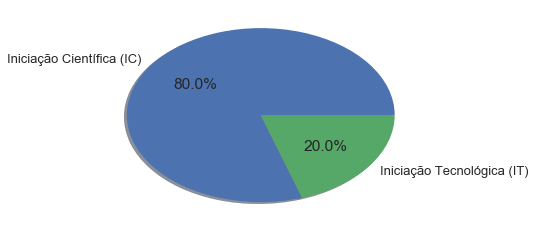

In [18]:
## Qual a porcentagem de bolsistas em cada categoria?

categorias = df_discentes_bolsistas.categoria.value_counts()

# Definimos as caracteristicas do gráfico de pizza e mostramos
sns.set(font_scale=1.3)
plt.pie(list(categorias), labels=list(categorias.keys()), autopct='%1.1f%%', shadow=True)
plt.show()

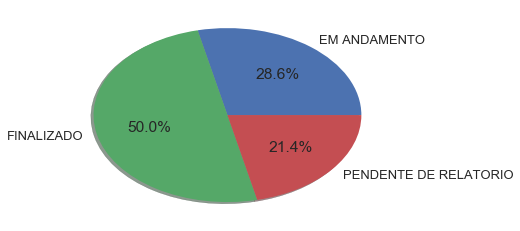

In [19]:
## Qual a situação atual das bolsas de iniciação cientifica dos alunos do BTI?

bolsas = dict(df_discentes_bolsistas.groupby('status_y')['matricula'].count())

# Definimos as caracteristicas do gráfico de pizza e mostramos
sns.set(font_scale=1.3)
plt.pie(list(bolsas.values()), labels=list(bolsas.keys()), autopct='%1.1f%%', shadow=True)
plt.show()

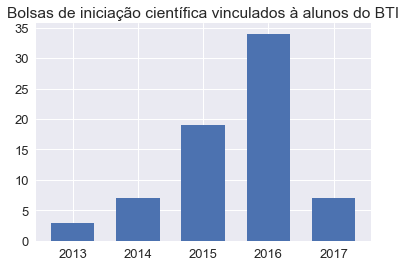

In [20]:
## Qual a quantidade de bolsistas por ano?

# Ordenamos o DataFrame
df_discentes_bolsistas = df_discentes_bolsistas.sort_values('ano')

# Criamos um gráfico relacionando os anos com os projetos de pesquisas dos alunos do BTI
sns.set(font_scale=1.3)
plt.xlabel('')
plt.bar(list(df_discentes_bolsistas['ano'].unique()), 
        list(df_discentes_bolsistas.groupby('ano')['matricula'].count()), 1/1.5, align="center")
plt.title('Bolsas de iniciação científica vinculados à alunos do BTI')
plt.show()

Text(16.348,0.5,'Quantidade')

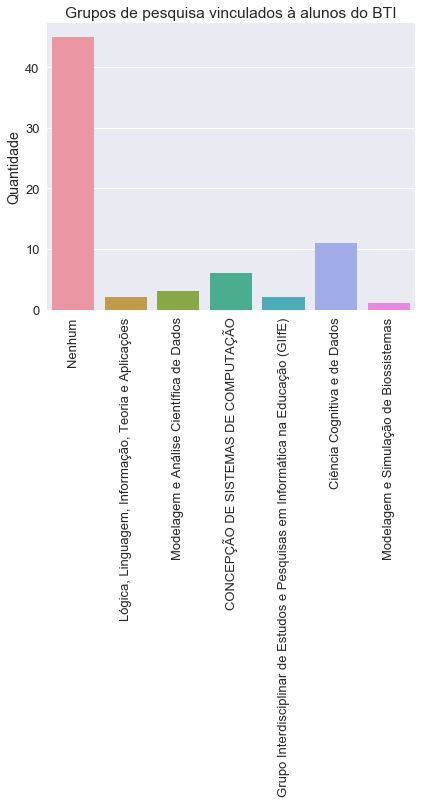

In [21]:
## Qual a quantidade de alunos bolsistas participantes de grupos de pesquisa?

df_discentes_bolsistas.grupo_pesquisa = df_discentes_bolsistas.grupo_pesquisa.fillna('Nenhum')

# Criamos um gráfico de barras relacionando os grupos de pesquisa do imd com os bolsistas do BTI
sns.set(font_scale=1.3)
g = sns.factorplot('grupo_pesquisa',data=df_discentes_bolsistas, kind="count", size=5, aspect=1.5)
g.set_xticklabels(rotation=90)
plt.title('Grupos de pesquisa vinculados à alunos do BTI')
plt.xlabel('')
plt.ylabel('Quantidade')

### <a id="docentes">Docentes</a>
- Qual a quantidade de docentes (do IMD e DIMAP) que são e não considerados pesquisadores?
- Qual a formação dos docentes do IMD e DIMAp e qual a formação dos pesquisadores?
- Qual a quantidade média de projetos coordenados, internos e externos dos pesquisadores do IMD e DIMAP?
- Quais são as principais áreas de conhecimento que os docentes desenvolvem projetos de pesquisa?
- Quais palavras mais aparecem nas palavras chaves das pesquisas realizadas?

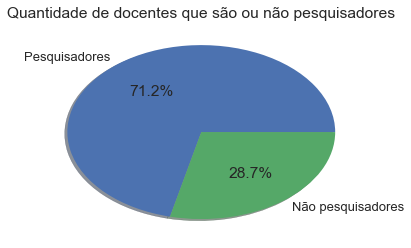

In [23]:
## Qual a quantidade de docentes (do IMD e DIMAP) que são e não considerados pesquisadores?

# Primeiro pegamos a quantidade de pesquisadores e 
# depois a diferença entre docentes do IMD e DIMAP no total e os que são pesquisadores
piePesquisadores = {
    'Pesquisadores' : len(df_pesquisadores.id_servidor.values),
    'Não pesquisadores' : len(list(set(df_docentes_imd.id_servidor.values) - set(df_pesquisadores.id_servidor.values)))
}

# Definimos as caracteristicas do gráfico pie e mostramos
sns.set(font_scale=1.3)
plt.title('Quantidade de docentes que são ou não pesquisadores')
plt.pie(list(piePesquisadores.values()), labels=list(piePesquisadores.keys()),
        autopct='%1.1f%%', shadow=True);
plt.show()

Quantidade de docentes em cada formação:  {'DOUTORADO': 60, 'GRADUAÇÃO': 1, 'MESTRADO': 18}
Quantidade de docentes pesquisadores em cada formação:  {'MESTRADO': 13, 'DOUTORADO': 43}


/home/roleta/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


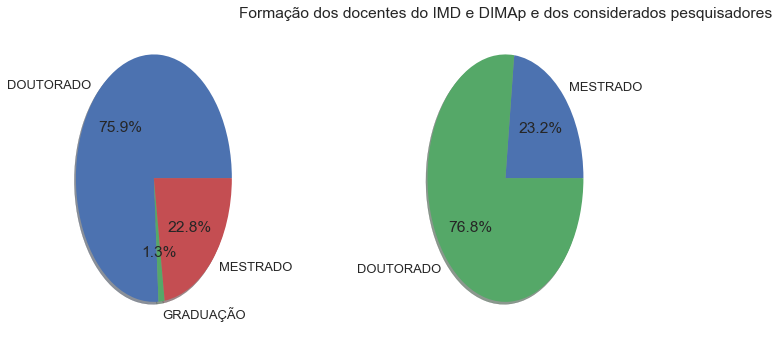

In [39]:
## Qual a formação dos docentes do IMD e DIMAp e qual a formação dos pesquisadores?

# Pegamos as formações
formacoes = dict(df_docentes_imd.groupby('formacao')['id_servidor'].count())
# Criamos uma fugira que terá dois gráficos (1 linha, 2 colunas)
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Definimos as caracteristicas do gráfico pie e mostramos
plt.title('Formação dos docentes do IMD e DIMAp e dos considerados pesquisadores')
ax[0].pie(list(formacoes.values()), labels=list(formacoes.keys()),
        autopct='%1.1f%%', shadow=True);

# Docentes pesquisadores
docentes_pesquisadores = dict()
df_docentes_pesquisadores = pd.merge(df_docentes_imd, df_pesquisadores, on='id_servidor')
for forma in df_docentes_pesquisadores['formacao'].unique():
    docentes_pesquisadores[forma] = df_docentes_pesquisadores[df_docentes_pesquisadores.formacao == forma]['id_servidor'].count()

# Definimos as caracteristicas do gráfico pie e mostramos
ax[1].pie(list(docentes_pesquisadores.values()),
        labels=list(docentes_pesquisadores.keys()),
        autopct='%1.1f%%', shadow=True);

print('Quantidade de docentes em cada formação: ', formacoes)
print('Quantidade de docentes pesquisadores em cada formação: ', docentes_pesquisadores)
fig.tight_layout()
fig.show()

In [24]:
## Qual a quantidade média de projetos coordenados, internos e externos dos pesquisadores do IMD e DIMAP?
sum_projetos = {
    'DOUTORADO' : {
        'coordenador' : 0,
        'internos' : 0,
        'externos' : 0
    },
    'MESTRADO' : {
        'coordenador' : 0,
        'internos' : 0,
        'externos' : 0
    }
}

for formacao in df_docentes_pesquisadores['formacao'].unique():
    # Servidores de determinada formação
    id_servidores = list(df_docentes_imd[df_docentes_imd.formacao == formacao].id_servidor)
    # Pesquisadores
    pesquisadores = df_pesquisadores[df_pesquisadores.id_servidor.isin(id_servidores)]
    
    for tipo_projetos in sum_projetos[formacao].keys():
        # Média de quantidade de projetos de determinado tipo pela quantidade de servidores de determinada formação
        sum_projetos[formacao][tipo_projetos] = pesquisadores[tipo_projetos].sum() / len(id_servidores)

pd.DataFrame(sum_projetos)

,DOUTORADO,MESTRADO
coordenador,0.883333,0.333333
externos,0.866667,0.444444
internos,1.850000,1.222222


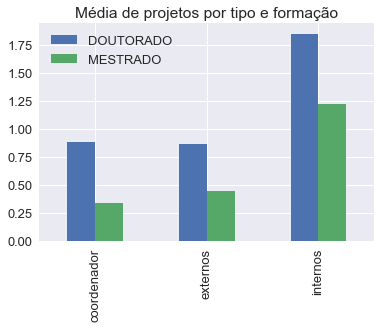

In [25]:
pd.DataFrame(sum_projetos).plot(kind="bar", title="Média de projetos por tipo e formação")

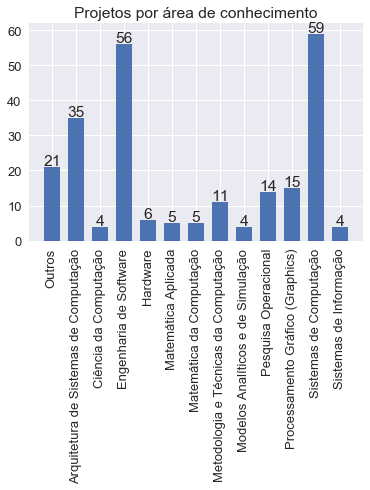

In [26]:
# Quais são as principais áreas de conhecimento que os docentes desenvolvem projetos de pesquisa?

# Pegamos os projetos de pesquisa desenvolvidos pelos servidores do IMD e DIMAP
df_pp_servidor = df_projetos_pesquisa[df_projetos_pesquisa['id_coordenador'].isin(df_pesquisadores.id_servidor.values)]

# Fazemos uma contagem da quantidade de projetos por área de conhecimento do CNPQ
pa_count = dict(df_pp_servidor.groupby('area_conhecimento_cnpq')['id_projeto_pesquisa'].count())

# Juntamos as áreas de conhecimento que possuem até 3 projetos de pesquisa registrados
pesquisa_areas = { 'Outros' : 0 }
for area in pa_count:
    if pa_count[area] <= 3:
        pesquisa_areas['Outros'] += pa_count[area]
    else:
        pesquisa_areas[area] = pa_count[area]

# Caracteristicas do gráfico de barra
sns.set(font_scale=1.3)
plt.bar(list(pesquisa_areas.keys()), list(pesquisa_areas.values()), 1/1.5, align="center")

# Rotação dos rótulos do eixo X
plt.xticks(rotation=90)

# Texto em cima de cada barra
for tema in pesquisa_areas:
    plt.text(tema, (pesquisa_areas[tema]+0.5), str(pesquisa_areas[tema]), horizontalalignment='center')

plt.title('Projetos por área de conhecimento')
plt.show()

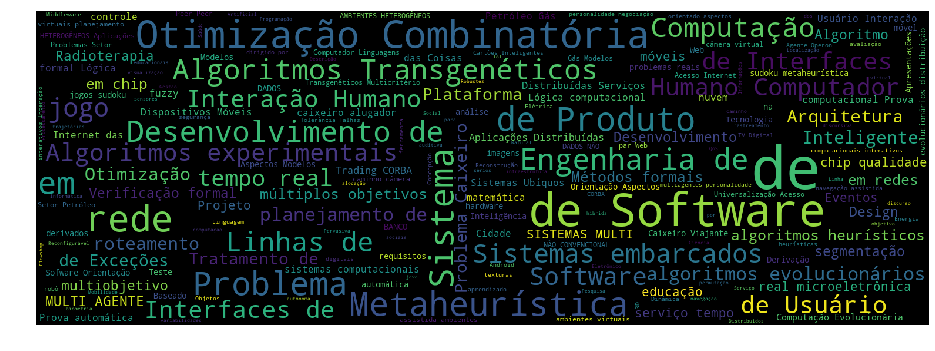

In [27]:
# Quais palavras mais aparecem nas palavras chaves das pesquisas realizadas?
palavras = ""

for palavra_chave in df_pp_servidor.palavras_chave:
    palavras = palavras + " " + palavra_chave

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(palavras)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Podemos concluir que docentes com grau de formação o doutorado possuem as maiores médias de participação em pesquisa, chegando a coordenar um projeto de pesquisa duas vezes mais do que alguém que possui mestrado. Também pudemos notar que não é regra áreas de conhecimento mais abrangentes, como "Sistemas de Computação" e "Engenharia de Software", possuirem mais projetos registrados do que áreas de conhecimento mais específicas, visto, por exemplo, que "Ciência da Computação" e "Sistemas de Informação" possuem poucas pesquisas registradas. Isso é ressaltado quando análisamos as palavras-chave dos projetos e vimos que palavras-chave específicas aparecem em destaque, como "Metaheurística" e "Algoritmos Transgenéticos".

Essas análises se tornam interessantes quando queremos ter uma visão melhor sobre como a pesquisa está sendo desenvolvida no IMD e DIMAp, conhecendo melhor os docentes envolvidos e o conhecimento gerado durante o processo.